<a href="https://colab.research.google.com/github/yuju1998/A-Search-520/blob/main/Data/Plots-and-Analysis/Voyage_to_the_Unknown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import github2pypi
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
#!git clone https://github.com/PietropaoloV/A-Search-520.git

In [3]:
path = "/content/A-Search-520/Data"
files = os.listdir(path)
files.sort()
for file in files:
  print(file)

Q4-AStar-Manhattan-NoBumps-Results.csv
Q5-AStar-Chebyshev-NoBumps-Results.csv
Q5-AStar-Euclidean-NoBumps-Results.csv
Q5-AStar-Manhattan-NoBumps-Results.csv
Q6-AStar-Chebyshev-NoBumps-Results.csv
Q6-AStar-Euclidean-NoBumps-Results.csv
Q6-AStar-Manhattan-NoBumps-Results.csv
Q6-BFS-NoBumps-Results.csv
Q7-AStar-Chebyshev-Bumps-Results.csv
Q7-AStar-Euclidean-Bumps-Results.csv
Q7-AStar-Manhattan-Bumps-Results.csv
Q7-BFS-Bumps-Results.csv
Q8Dist=1-AStar-Manhattan-NoBumps-Results.csv
Q8Dist=11-AStar-Manhattan-NoBumps-Results.csv
Q8Dist=16-AStar-Manhattan-NoBumps-Results.csv
Q8Dist=21-AStar-Manhattan-NoBumps-Results.csv
Q8Dist=26-AStar-Manhattan-NoBumps-Results.csv
Q8Dist=31-AStar-Manhattan-NoBumps-Results.csv
Q8Dist=36-AStar-Manhattan-NoBumps-Results.csv
Q8Dist=41-AStar-Manhattan-NoBumps-Results.csv
Q8Dist=46-AStar-Manhattan-NoBumps-Results.csv
Q8Dist=51-AStar-Manhattan-NoBumps-Results.csv
Q8Dist=6-AStar-Manhattan-NoBumps-Results.csv
Q9prob=15-AStar-WeightedChebyshev-NoBumps-Results.csv
Q9prob

# Question 4

In [4]:
q4 = pd.read_csv(path + "/" + files[0])
print(q4)

       Probability  Solvable  ...  Runtime Weight (EC)  Backtrack Steps (EC)
0              0.0      True  ...                  1.0                   1.0
1              0.0      True  ...                  1.0                   1.0
2              0.0      True  ...                  1.0                   1.0
3              0.0      True  ...                  1.0                   1.0
4              0.0      True  ...                  1.0                   1.0
...            ...       ...  ...                  ...                   ...
10095        100.0     False  ...                  1.0                   1.0
10096        100.0     False  ...                  1.0                   1.0
10097        100.0     False  ...                  1.0                   1.0
10098        100.0     False  ...                  1.0                   1.0
10099        100.0     False  ...                  1.0                   1.0

[10100 rows x 9 columns]


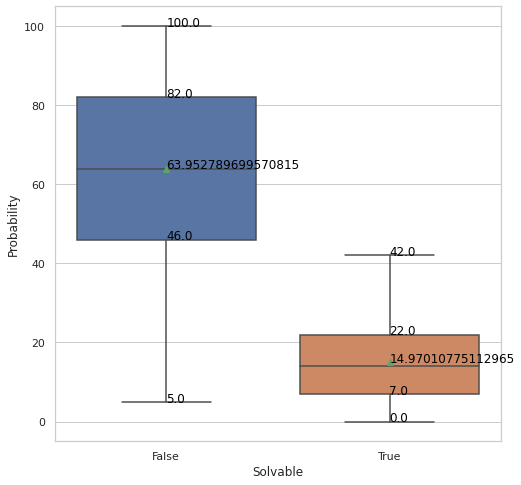

In [5]:
# Plot for Question 4
plt.figure(figsize = (8, 8))
q4_box = sns.boxplot(x=q4['Solvable'], y=q4['Probability'], showmeans=True)
q4_mean = q4.groupby(['Solvable'])['Probability'].mean()
q4_summary = q4.groupby(['Solvable'])['Probability'].quantile([0,0.25,0.5,0.75,1])

#print(q4_mean, q4_summary)

for xtick in q4_box.get_xticks():
   q4_box.text(xtick, q4_summary[xtick][0], str(q4_summary[xtick][0]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][0.25], str(q4_summary[xtick][0.25]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][0.75], str(q4_summary[xtick][0.75]), size='large', color='black')
   q4_box.text(xtick, q4_summary[xtick][1], str(q4_summary[xtick][1]), size='large', color='black')
   q4_box.text(xtick, q4_mean[xtick], str(q4_mean[xtick]), size='large', color='black')



# Question 5

In [6]:
q5_c = pd.read_csv(path + "/" + files[1])
q5_e = pd.read_csv(path + "/" + files[2])
q5_m = pd.read_csv(path + "/" + files[3])

> A star

      Probability   Distance  Value
0             0.0  Chebyshev  200.0
1             0.0  Chebyshev  200.0
2             0.0  Chebyshev  200.0
3             0.0  Chebyshev  200.0
4             0.0  Chebyshev  200.0
...           ...        ...    ...
9295         30.0  Manhattan  412.0
9296         30.0  Manhattan  426.0
9297         30.0  Manhattan  360.0
9298         30.0  Manhattan  300.0
9299         30.0  Manhattan  320.0

[9300 rows x 3 columns]


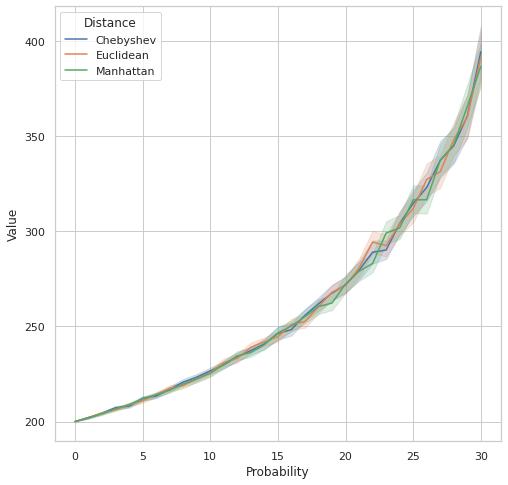

In [7]:
q5_astar = pd.concat([q5_c['Probability'], q5_c['Path Length (Repeated A*'].rename('Chebyshev'), q5_e['Path Length (Repeated A*'].rename('Euclidean'), q5_m['Path Length (Repeated A*'].rename('Manhattan')], axis=1)
q5_astar = q5_astar.melt('Probability', var_name='Distance', value_name='Value')
print(q5_astar)
plt.figure(figsize=(8, 8))
q5_astar_line = sns.lineplot(x=q5_astar['Probability'], y=q5_astar['Value'], hue=q5_astar['Distance'])


> Number of Cells Processed

      Probability Number_of_Cells  Value
0             0.0       Chebyshev    201
1             0.0       Chebyshev    201
2             0.0       Chebyshev    201
3             0.0       Chebyshev    201
4             0.0       Chebyshev    201
...           ...             ...    ...
9295         30.0       Manhattan  11135
9296         30.0       Manhattan   9877
9297         30.0       Manhattan   8591
9298         30.0       Manhattan   7205
9299         30.0       Manhattan   6924

[9300 rows x 3 columns]


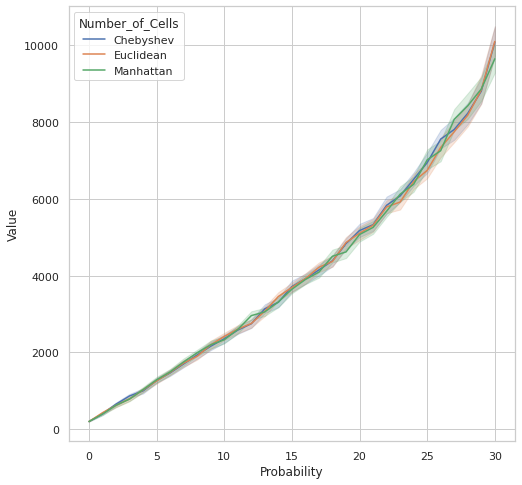

In [8]:
q5_cells = pd.concat([q5_c['Probability'], q5_c['Number of Cells Processed'].rename('Chebyshev'), q5_e['Number of Cells Processed'].rename('Euclidean'), q5_m['Number of Cells Processed'].rename('Manhattan')], axis=1)
q5_cells = q5_cells.melt('Probability', var_name='Number_of_Cells', value_name='Value')
print(q5_cells)
plt.figure(figsize=(8, 8))
q5_cells_line = sns.lineplot(x=q5_cells['Probability'], y=q5_cells['Value'], hue=q5_cells['Number_of_Cells'])


> Runtime

      Probability    Runtime    Value
0             0.0  Chebyshev   183600
1             0.0  Chebyshev   185700
2             0.0  Chebyshev   196400
3             0.0  Chebyshev   201100
4             0.0  Chebyshev   182500
...           ...        ...      ...
9295         30.0  Manhattan  5167300
9296         30.0  Manhattan  4037800
9297         30.0  Manhattan  3461100
9298         30.0  Manhattan  3149800
9299         30.0  Manhattan  2748000

[9300 rows x 3 columns]


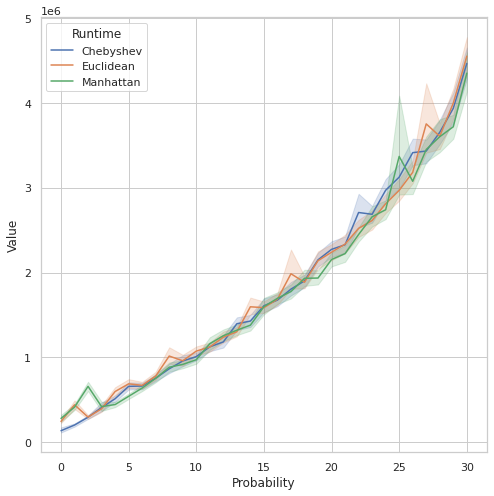

In [9]:
q5_time = pd.concat([q5_c['Probability'], q5_c['Runtime'].rename('Chebyshev'), q5_e['Runtime'].rename('Euclidean'), q5_m['Runtime'].rename('Manhattan')], axis=1)
q5_time = q5_time.melt('Probability', var_name='Runtime', value_name='Value')
print(q5_time)
plt.figure(figsize=(8, 8))
q5_time_line = sns.lineplot(x=q5_time['Probability'], y=q5_time['Value'], hue=q5_time['Runtime'])